* 1.1 สร้าง linear regression from scratch แล้ว run แค่เพียง inference (no update)

In [152]:
import numpy as np

class LinearRegressionScratch:
   def __init__(self):
       self.coef_ = None
       self.intercept_ = None

   def fit(self, X, y):
       # Calculate coefficients using the closed-form solution
       self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
       self.intercept_ = np.mean(y - np.dot(X, self.coef_))

   def predict(self, X):
       return np.dot(X, self.coef_) + self.intercept_

m = 1 # Noise Magnitude
X_HW = 2 * np.random.rand(100, 1)
y_HW = 3 * (X_HW ** 3) + 2 * (X_HW ** 2) + 3 * (X_HW ** 1) + 4 + ((np.random.rand(100, 1) - 1) * 2 * m)


* 1.2 สร้าง polynomial regression from scratch แล้ว run กำหนดให้อัตราการเรียนรู้ (learning rate) เท่ากับ 1e-3 และจำนวนรอบการวนซ้ำ (iteration) เท่ากับ 1000 รอบ

In [153]:
# param init
alpha = 1e-3  # learning rate
iterations = 1000  # iteration of Gradient Descent
m = len(X_HW)

# forward
class PolyRegressionScratch:
    """
    Custom implementation of linear regression using ordinary least squares (OLS).
    """
    def __init__(self):
        self.a2 = 1
        self.a1 = 1
        self.a0 = 1

    def predict(self, x):
        return self.a2 * x**2 + self.a1 * x + self.a0

    # Cost function (MSE)
    def compute_cost(self, X_HW, y_HW):
        predictions = self.predict(X_HW)
        cost = (1/(m)) * np.sum((predictions - y_HW)**2)
        return cost

    def fit(self, X_HW, y_HW):
        # Gradient Descent
        for _ in range(iterations):
            predictions = self.predict(X_HW)
            # gradient compute
            dJ_da0 = (2/m) * np.sum(predictions - y_HW)
            dJ_da1 = (2/m) * np.sum((predictions - y_HW) * X_HW)
            dJ_da2 = (2/m) * np.sum((predictions - y_HW) * X_HW**2)
            # parameter update
            self.a0 -= alpha * dJ_da0
            self.a1 -= alpha * dJ_da1
            self.a2 -= alpha * dJ_da2
            # cost compute if more iteration (optional)
            if _ % 100 == 0:
                print(f"Iteration {_}, Cost: {self.compute_cost(X_HW=X_HW, y_HW=y_HW)}")
        
        print(f"Optimized a0: {self.a0}, a1: {self.a1}, a2: {self.a2}")

poly_reg_scratch = PolyRegressionScratch()
poly_reg_scratch.fit(X_HW, y_HW)

Iteration 0, Cost: 145.98993741473453
Iteration 100, Cost: 33.776080849892296
Iteration 200, Cost: 10.07820385897172
Iteration 300, Cost: 4.926379205652501
Iteration 400, Cost: 3.6806593893490978
Iteration 500, Cost: 3.2749871593340028
Iteration 600, Cost: 3.0647427123096227
Iteration 700, Cost: 2.9122667863462044
Iteration 800, Cost: 2.78634584120645
Iteration 900, Cost: 2.678378970010415
Optimized a0: 2.561882455299627, a1: 3.8347379104587036, a2: 6.31412019152888


* 1.3 เเปลงข้อมูลเป็น extended โดยที่กำหนด power degree เอง และนำ extended dataset ไป fit กับโมเดล Linear Regression

In [154]:
from sklearn.preprocessing import PolynomialFeatures
d = 3 #เเทนค่าด้วย Degree ที่ควรจะใช้
poly_features = PolynomialFeatures(degree=d, include_bias=False)
X_poly = poly_features.fit_transform(X_HW)
print(X_HW[0], X_poly[0])

from sklearn.linear_model import LinearRegression
# fit with Linear Regression from scikit-learn
model = LinearRegression() 
model.fit(X_poly,y_HW)
y_p2_scikit = model.predict(X_poly)
print(model.intercept_, model.coef_)

# fit with Linear Regression(from Scratch)
lin_reg_scratch = LinearRegressionScratch()
lin_reg_scratch.fit(X_HW, y_HW)
print(lin_reg_scratch.intercept_, lin_reg_scratch.coef_)

[1.24269658] [1.24269658 1.54429479 1.91908985]
[3.32277342] [[2.75192532 1.7342614  3.19231612]]
-0.4580682706841081 [[14.60387522]]


* 1.4 เเเสดงผล plot จาก matplotlib.pyplot ตามโค้ดต่อไปนี้

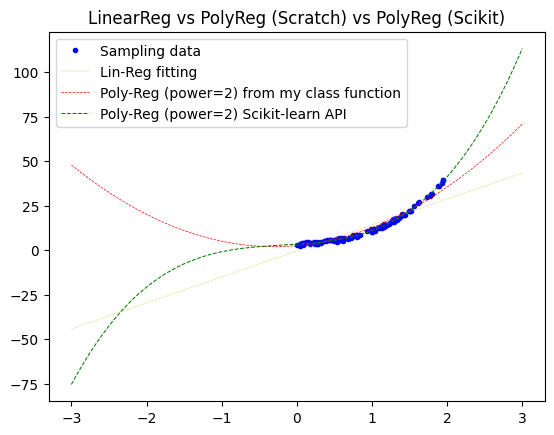

In [155]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(X_HW, y_HW, "b.", label='Sampling data')
x = np.linspace(-3, 3, 1000).reshape(-1, 1)


y_pred_linear_sc = lin_reg_scratch.predict(x)
y_pred_poly_sc = poly_reg_scratch.predict(x)
y_pred_linear_scikit = model.predict(poly_features.fit_transform(x))
#...linear and non-linear equation สำหรับพล็อตเส้นถดถอย ????...

plt.plot(x, y_pred_linear_sc, "y-.", label='Lin-Reg fitting', linewidth=0.25)
plt.plot(x, y_pred_poly_sc, "r--", label='Poly-Reg (power=2) from my class function', linewidth=0.5)
plt.plot(x, y_pred_linear_scikit, "g--", label='Poly-Reg (power=2) Scikit-learn API', linewidth=0.75)
plt.title('LinearReg vs PolyReg (Scratch) vs PolyReg (Scikit)')
plt.legend()

* 1.5 วัดผลความแปรปรวนของตัวแปรตามหรือความเข้ากันของระบบเชิงเส้นถดถอยที่ทำนายต่อตัวแปรตามจริงจากระบบวัด R-Squared (R^2 metric) จากทั้ง 3 สมการที่ทำนายพร้อมอธิบายความแตกต่างจากการวัดและแสดงผลที่เกิดขึ้น

In [156]:
from sklearn.metrics import r2_score

from sklearn.metrics import r2_score

y_linear2 = lin_reg_scratch.predict(X_HW)
y_poly2 = poly_reg_scratch.predict(X_HW)
y_scikit2 = model.predict(poly_features.fit_transform(X_HW))

r2_linear = r2_score(y_HW, y_linear2)
r2_poly = r2_score(y_HW, y_poly2)
r2_scikit = r2_score(y_HW, y_scikit2)

print(f"R² for Linear Regression: {r2_linear:.4f}")
print(f"R² for Polynomial Regression (Manual): {r2_poly:.4f}")
print(f"R² for Polynomial Regression (Scikit): {r2_scikit:.4f}")

R² for Linear Regression: 0.8708
R² for Polynomial Regression (Manual): 0.9702
R² for Polynomial Regression (Scikit): 0.9962


การวิเคราะห์ผล

1.  Linear Regression (Scratch):

*   ค่าความแม่นยําจะต่ำกว่าโมเดลแบบ Polynomial Regression เนื่องจาก Linear Regression เป็นโมเดลที่สร้างจากสมการเส้นตรง แต่ข้อมูลจริงที่ใช้นั้นถูกสร้างจากสมการพหุนาม
  คือ $$\textbf{y} = 3\textbf{x}^3 + 2\textbf{x}^2 + 3\textbf{x} + 4 + 2m*(rand(100,1)-1); m = noise $$
  ซึ่ง Linear Regression เป็นโมเดลแบบเชิงเส้นจึงไม่สามารถหาความสัมพันธ์ได้อย่างถูกต้องทั้งหมด
  

2.   Polynomial Regression (Scratch):

*   โมเดลนี้หาความสัมพันธ์ของข้อมูลที่มีลักษณะเป็น non-linear ได้ดี ซึ่งสอดคล้องกับลักษณะของข้อมูลที่เราใช้จึงทำให้มีความแม่นยําสูงขึ้น
*   การทำโมเดล Polynomial Regression แบบที่เราสร้างเอง(Scratch) อาจมีความแม่นยําน้อยกว่าโมเดลที่สร้างโดย library สําเร็จรูปเช่น Scikit-Learn เพราะการปรับพารามิเตอร์อาจมีข้อผิดพลาด เช่น การกำหนด learning rate หรือจำนวน iteration ที่ไม่เหมาะสม

3.   Polynomial Regression (Scikit-Learn):


*   ผลลัพธ์จาก Scikit-Learn มักจะมีค่าความแม่นยําสูงกว่าหรือใกล้เคียงกับ Polynomial Regression แบบที่เราสร้างเอง(Scratch) เพราะ Scikit-Learn เป็น library ที่มีการปรับแต่ง พารามิเตอร์ให้เหมาะสมทําให้โมเดลมักจะมีความแม่นยํามากกว่าโมเดล Polynomial Regression แบบที่เราสร้างเอง(Scratch)